# **Los Juegos Olímpicos desde una perspectiva de género**  🥇 👭


## **Introducción**

Este proyecto busca analizar la historia de los Juegos Olímpicos desde Atenas 1896 a Río 2016, primero en forma general, para comprender la magnitud e importancia del evento para el mundo del deporte y después, desde un enfoque orientado a entender el papel de las mujeres en la historia del atletismo de alto rendimiento.


## **Contexto Comercial**

Los juegos Olímpicos son el evento deportivo más importante a nivel mundial. En sus competiciones se enfrentan deportistas de distintos orígenes étnicos y culturales y con distinto acceso a la oportunidad de desempeñarse o destacarse en una disciplina. 
Estudiar la evolución de este evento a lo largo de la historia nos permite comprender el desarrollo de los deportes a través de los años. Además refleja la inclusión en el deporte de alto rendimiento de personas con menos acceso a entrenaminentos de alta categoría, como en el caso de competidores de países subdesarrollados y competidoras mujeres. 

##**Problema Comercial** 

- En primera instancia este proyecto busca determinar cuál fue la **evolución de cantidad de medallas entregadas** a lo largo de los años, planteándonos preguntas tales como ¿Se entregan más medallas en los juegos de verano o en los juegos de invierno? ¿Con el correr de los años se incrementó la participación y la entrega de medallas? ¿Cuál fue el crecimiento de **incorporación de disciplinas**? ¿Las disciplinas siguen siendo las mismas que las primeras ediciones? ¿Cómo creció la **cantidad de países participantes**? 

- En segunda instancia, este análisis busca determinar cuál fue **el papel que jugaron las mujeres** a lo largo de la historia de los Juegos Olímpicos. ¿Cuál era la participación de las mujeres al inicio de los JJOO? ¿Cómo fue la evolución del papel de la mujer en el evento? ¿El porcentaje de competidoras femeninas creció a lo largo del tiempo o se sostiene la misma relación que años atrás?

- ¿Es posible **predecir la probabilidad de un competidor de obtener una medalla** en función de sus características físicas, su nacionalidad y la disciplina en la que participa, teniendo como único input la historia de los JJOO? En el marco de esta pregunta, se seleccionaron dos disciplinas específicas para realizar un análisis preliminar:

1.   **Basquetball**: Una pregunta corriente a la hora de abordar el básquet es cuánto influye la altura del jugador para tener éxito en esta disciplina. En base a esta conjetura inicial y con la información de alturas y atletas premiados vs los que no han sido premiados es que se buscó determinar: ¿Influye la altura a la hora de obtención de medallas? 
2.   **Atletismo**: Se estudió la disciplina desde distintos puntos de vista, tratando de determinar en primera instancia dónde reside la aglomeración de países que se llevan las medallas año tras año, haciendo un enfoque particular en su apertura por género. 
Enfocándo el análisis al género femenino, se busca determinar si existe una relación entre las características físicas de las competidoras y la capacidad de destacarse en las distintas prácticas que comprende el atletismo.

- Por último, se incorpora al análisis la información del Banco Mundial para evaluar desde una perspectiva de género **qué situaciones que condicionan la vida y el desarrollo de las mujeres alrededor del mundo** pueden ser condicionantes a la hora de perseguir una carrera como deportistas de alto rendimiento. Se elige como indicador clave para el análisis "**Adolescent fertility rate (births per 1,000 women ages 15-19)**"

## **Contexto Analítico**

#### **Fuentes**



*   Dataset "120 Years of Olympic History" - Source: Sports Reference - Licencia de dominio público. Contiene los siguientes campos: temporada (verano - invierno), año, países, medallas obtenidas, disciplina, género, edad, altura y peso.
*   API del Banco Mundial: El Banco Mundial está compuesto por 189 países miembros y está conformado por instituciones que trabajan para obtener soluciones sustentables que reduzcan la pobreza y construyan la prosperidad en los países en desarrollo. Tiene un banco de datos de acceso público (https://data.worldbank.org/) y una API a la cual se accede mediante el paquete "WBGAPI" (https://pypi.org/project/wbgapi/). Contiene los siguientes features:


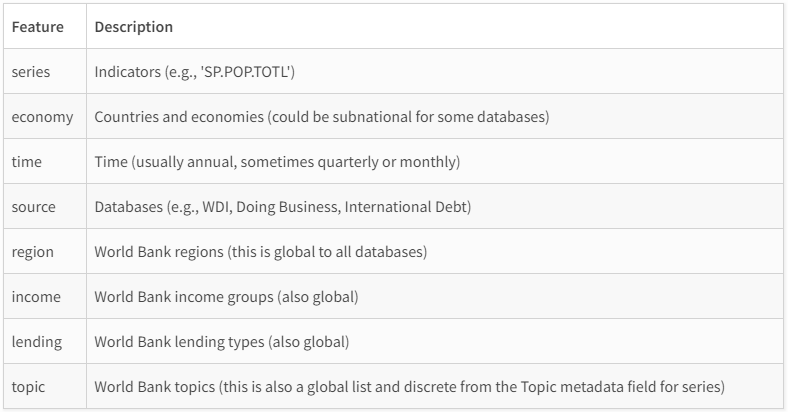



#### Librerías utilizadas

In [286]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#Primera parte: Análisis a partir de la historia

#### Dataset 


**Nombre del dataset 1: *120 Years of Olympic History***

Contiene data histórica de los Juegos Olímpicos, desde Atenas 1896 a Río 2016. Cada fila corresponde a una competición particular de un atleta individual e incluye la siguiente información:
- Nombre
- Sexo
- Edad
- Altura
- Peso
- País
- Medalla (si ganó alguna)
- Datos del evento: temporada, deporte, disciplina, ciudad, comité olímpico (NOC) y año


In [287]:
df=pd.read_csv('/content/athlete_events.csv')

In [288]:
df.head(5)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


**Primer acercamiento a la data**

In [289]:
cantfilas=df['Name'].count()
cantcol=df.columns
print('La cantidad de registros es ',cantfilas)
print('Los datos recopilados para cada ID son:',)
for i in range(0,14):
  print('-',cantcol[i])

La cantidad de registros es  271116
Los datos recopilados para cada ID son:
- ID
- Name
- Sex
- Age
- Height
- Weight
- Team
- NOC
- Games
- Year
- Season
- City
- Sport
- Event


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## **Exploratory Data Analysis**

#### Evolución de cantidad de medallas entregadas a lo largo de los años

In [291]:
#Dataframe que contiene Año - Temporada - Medalla obtenida. Quitamos registros de participantes que no ganaron ninguna medalla
med=df[['Year','Season','Medal']].dropna()
med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    39783 non-null  int64 
 1   Season  39783 non-null  object
 2   Medal   39783 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [292]:
#Filtramos por temporada y agrupamos
wmed=med[med.Season=='Winter']
cuenta_wmed=wmed.groupby(['Year']).count()

smed=med[med.Season=='Summer']
cuenta_smed=smed.groupby(['Year']).count()



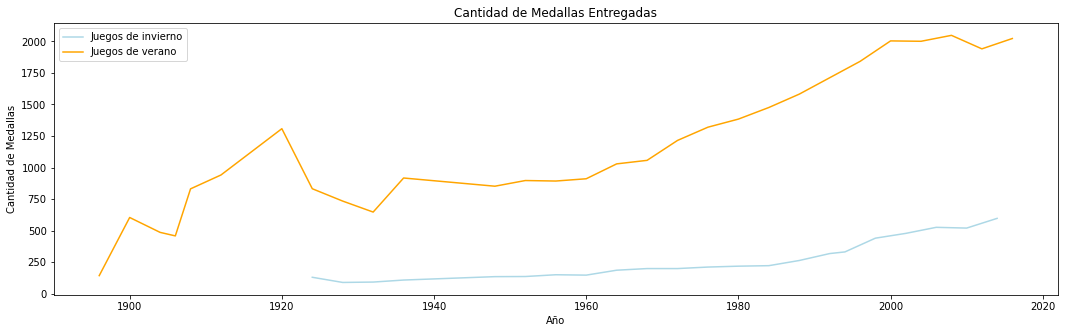

In [293]:
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(cuenta_wmed.Medal,color='lightblue',label='Juegos de invierno')
ax.plot(cuenta_smed.Medal,color='orange',label='Juegos de verano')
ax.set_xlabel('Año')  
ax.set_ylabel('Cantidad de Medallas') 
ax.set_title('Cantidad de Medallas Entregadas')     
ax.legend()


Se puede observar claramente cómo los juegos aumentaron en magnitud a lo largo de los años, tanto los de verano como los de invierno. Podemos ver además que en los juegos de verano se entrega una cantidad mucho mayor de medallas, de lo que se puede inferir una mayor cantidad de disciplinas y deportes.

#### Cantidad de participantes por género en JJOO de verano

In [294]:
#Dataframe que contiene solo las ediciones de verano 
dfs=df[df.Season=='Summer'] 
#Dataframe con los y las participantes, su género y el año en que participaron. Quitamos registros duplicados (la misma persona que participó el mismo año)
partic=dfs[['Year','Name', 'Sex']].drop_duplicates()
#Filtramos y agrupamos
fpart=partic[partic.Sex=='F']
cuenta_fpart=fpart.groupby(['Year'],as_index=True).count()
mpart=partic[partic.Sex=='M']
cuenta_mpart=mpart.groupby(['Year'],as_index=True).count()



In [295]:
#Construimos Dataframe para graficar
Yearlist=list(range(1896,2017,1))
personas=pd.DataFrame(index=Yearlist,data={'Mujeres':cuenta_fpart.Sex,'Hombres':cuenta_mpart.Sex}).dropna(how='all')


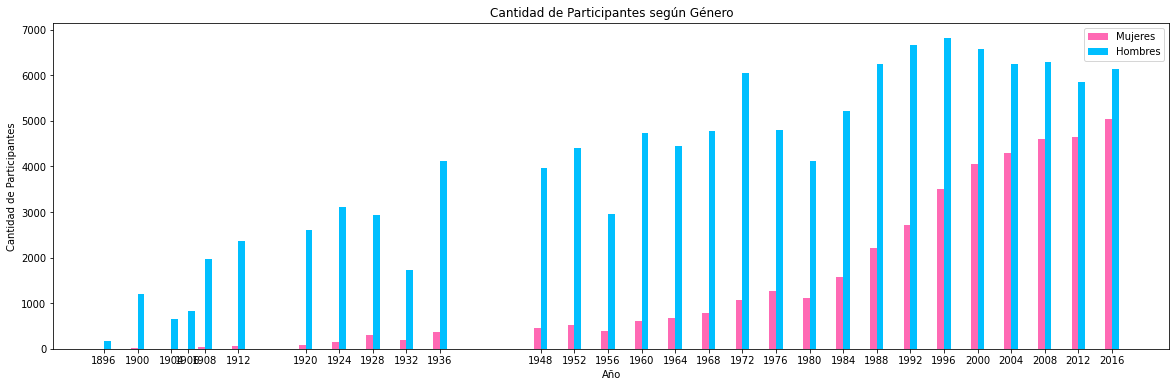

In [296]:
fig, ax = plt.subplots(figsize=(20,6))
ax.bar(personas.index,personas.Mujeres,color='hotpink',align='edge',width=-.8,label='Mujeres')
ax.bar(personas.index,personas.Hombres,color='deepskyblue',align='edge',label='Hombres')
ax.set_xticks(personas.index)
ax.set_xlabel('Año')  
ax.set_ylabel('Cantidad de Participantes') 
ax.set_title('Cantidad de Participantes según Género')     
ax.legend()


¿Qué papel jugaron las deportistas mujeres en la historia de los JJOO?
 Puede verse ver que, a pesar de que prácticamente desde el comienzo de la historia de los JJOO hubo participación de mujeres, su proporción a comparación de sus colegas hombres fue muy baja o prácticamente nula durante mucho tiempo. Por suerte, esta realidad comenzó a cambiar a partir de los años 90 y la participación de mujeres y su proporción respecto al total de atletas muestran una clara tendencia a continuar aumentando. 

#### Crecimiento de los Juegos Olímpicos de verano a lo largo de la historia

In [297]:
#Para dimensionar los juegos de cada año, encontramos la cantidad de valores únicos para las siguentes columnas:
cant=dfs.drop(['ID','Sex','Age','Height','Weight','Games','City','Season','Medal','NOC'],axis=1).groupby('Year',as_index=False).nunique()
cant.head()

,Year,Name,Team,Sport,Event
0,1896,176,18,9,43
1,1900,1220,190,20,90
2,1904,650,79,18,95
3,1906,841,52,13,74
4,1908,2024,73,24,109


In [298]:
#Filtramos el primer y el último año del dataset
primyult=cant.loc[(cant.Year==1896)|(cant.Year==2016)]
primyult

,Year,Name,Team,Sport,Event
0,1896,176,18,9,43
28,2016,11174,249,34,306


Text(0.5, 0, 'Año')

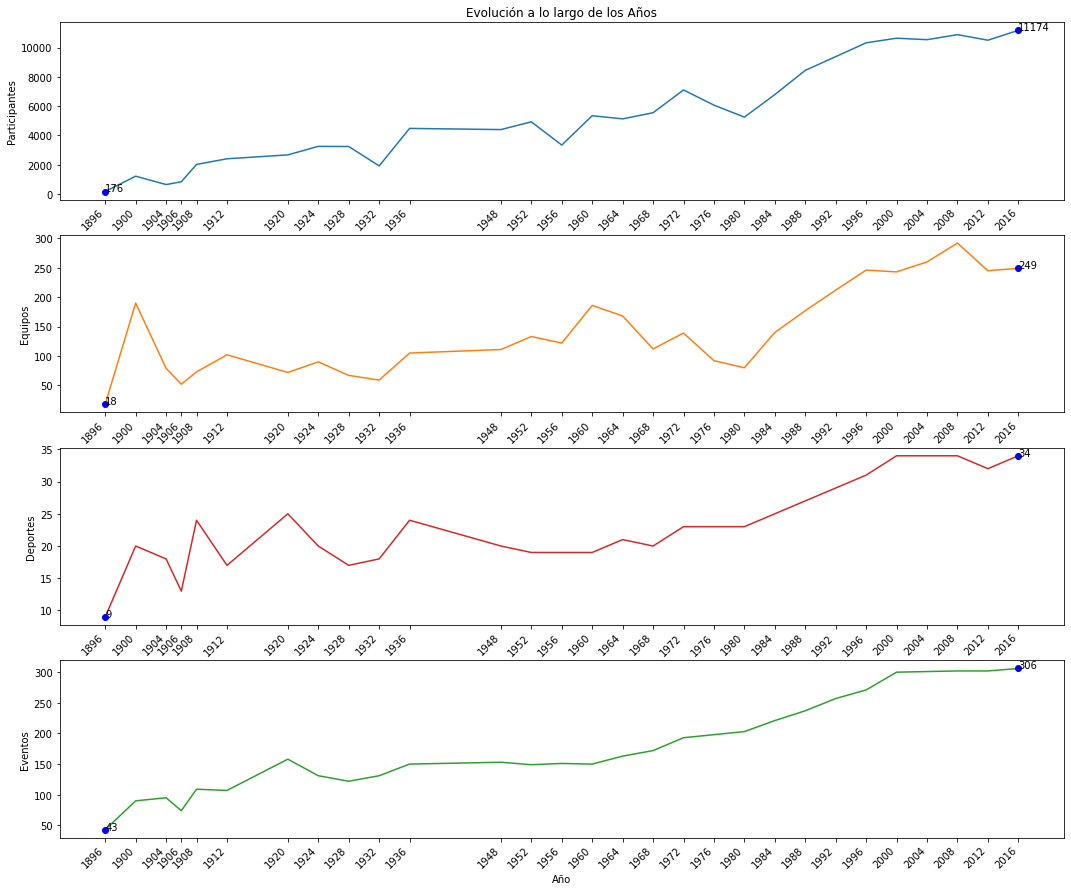

In [299]:
#Graficamos en paralelo las 4 variables
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(18, 15), sharex=False, sharey=False)  
ax[0].plot(cant.Year, cant['Name'], label='Cantidad de participantes')
ax[0].plot(primyult.Year,primyult.Name,'bo')
ax[0].annotate(primyult.Name.values[0],xy=(primyult.Year.values[0], primyult.Name.values[0]))
ax[0].annotate(primyult.Name.values[1],xy=(primyult.Year.values[1], primyult.Name.values[1]))

ax[1].plot(cant.Year, cant['Team'], label='Cantidad de equipos', color='C1')
ax[1].plot(primyult.Year,primyult.Team,'bo')
ax[1].annotate(primyult.Team.values[0],xy=(primyult.Year.values[0], primyult.Team.values[0]))
ax[1].annotate(primyult.Team.values[1],xy=(primyult.Year.values[1], primyult.Team.values[1]))

ax[2].plot(cant.Year, cant['Sport'], label='Cantidad de deportes', color='C3')
ax[2].plot(primyult.Year,primyult.Sport,'bo')
ax[2].annotate(primyult.Sport.values[0],xy=(primyult.Year.values[0], primyult.Sport.values[0]))
ax[2].annotate(primyult.Sport.values[1],xy=(primyult.Year.values[1], primyult.Sport.values[1]))

ax[3].plot(cant.Year, cant['Event'], label='Cantidad de eventos', color='C2')
ax[3].plot(primyult.Year,primyult.Event,'bo')
ax[3].annotate(primyult.Event.values[0],xy=(primyult.Year.values[0], primyult.Event.values[0]))
ax[3].annotate(primyult.Event.values[1],xy=(primyult.Year.values[1], primyult.Event.values[1]))


ax[0].set_title('Evolución a lo largo de los Años') 
ax[0].set_ylabel('Participantes')
ax[0].set_xticks(cant.Year)
ax[0].set_xticklabels(cant.Year,rotation=45,horizontalalignment='right')

ax[1].set_ylabel('Equipos')
ax[1].set_xticks(cant.Year)
ax[1].set_xticklabels(cant.Year,rotation=45,horizontalalignment='right')

ax[2].set_ylabel('Deportes')
ax[2].set_xticks(cant.Year)
ax[2].set_xticklabels(cant.Year,rotation=45,horizontalalignment='right')

ax[3].set_ylabel('Eventos')   
ax[3].set_xticks(cant.Year)
ax[3].set_xticklabels(cant.Year,rotation=45,horizontalalignment='right')
ax[3].set_xlabel('Año')



Se observa que la magnitud del evento creció a lo largo de la historia, amesetándose a partir del año 2000. Si se compara el primer registro de 1896 contra el 2016, se concluye que las cantidades de Participantes, Deportes, Eventos y Equipos aumentaron considerablemente.

#### Distribución de alturas de jugadores de Basketball Masculino que ganaron medalla de Oro en JJOO de verano

In [300]:
#Filtramos de forma secuencial el deporte, el género y la medalla obtenida. Chequeamos que no haya valores nulos
bskt=dfs[dfs.Sport=='Basketball']
bskt2=bskt[bskt.Sex=='M']
bskt3=bskt2[bskt2.Medal=='Gold']
bskt3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 609 to 270120
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      234 non-null    int64  
 1   Name    234 non-null    object 
 2   Sex     234 non-null    object 
 3   Age     234 non-null    float64
 4   Height  234 non-null    float64
 5   Weight  233 non-null    float64
 6   Team    234 non-null    object 
 7   NOC     234 non-null    object 
 8   Games   234 non-null    object 
 9   Year    234 non-null    int64  
 10  Season  234 non-null    object 
 11  City    234 non-null    object 
 12  Sport   234 non-null    object 
 13  Event   234 non-null    object 
 14  Medal   234 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 29.2+ KB


In [301]:
bskt3.describe().drop(['ID','Year'],axis=1)

,Age,Height,Weight
count,234.000000,234.000000,233.000000
mean,25.072650,197.782051,95.360515
std,3.585716,9.441004,12.372403
min,19.000000,177.000000,68.000000
25%,22.000000,191.000000,86.000000
50%,25.000000,198.000000,95.000000
75%,27.000000,205.000000,104.000000
max,35.000000,223.000000,137.000000


Text(0.5, 1.0, 'Distribución de alturas de jugadores de basketball masculinos que ganaron medallas de oro')

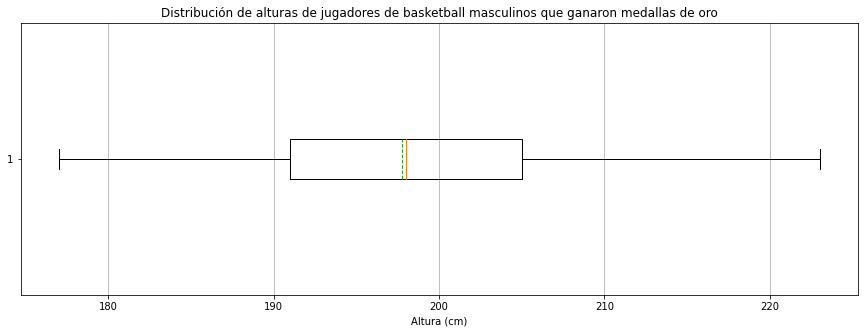

In [302]:
fig, ax = plt.subplots(figsize=(15,5))
ax.boxplot(bskt3.Height,meanline=True,showmeans=True,vert=False)
ax.xaxis.grid(True)
ax.set_xlabel('Altura (cm)')
ax.set_title('Distribución de alturas de jugadores de basketball masculinos que ganaron medallas de oro')


¿Mito o realidad? Los jugadores de basketball destacados por su habilidad, ¿se destacan también por su altura? Observando la distribución de las alturas de los jugadores de basket de todos los equipos que obtuvieron medallas de oro a lo largo de la historia, se puede llegar a la conclusión de que sí. La media se sitúa en 1.97 m y, a pesar de que el 25% de la muestra fluctúa entre los 177 y los 191 centímetros, el 75% de los jugadores mide 191 cm o más, llegando el más alto de la historia a medir 223 cm.

#### Análisis de la disciplina Atletismo durante la edición de los JJOO de verano del año 2016

In [303]:
#Dataframe con año, nombre, género, equipo, deporte y medalla obtenida
pteam=dfs[['Year','Name', 'Sex','Team','Sport','Medal']]



In [304]:
#Filtramos secuencialmente deporte = atletismo y año 2016. Chequeamos que no haya nulos
pteamath=pteam[pteam.Sport=='Athletics'] 
pteam2016=pteamath[pteamath.Year==2016]
pteam2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2508 entries, 148 to 271055
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    2508 non-null   int64 
 1   Name    2508 non-null   object
 2   Sex     2508 non-null   object
 3   Team    2508 non-null   object
 4   Sport   2508 non-null   object
 5   Medal   192 non-null    object
dtypes: int64(1), object(5)
memory usage: 137.2+ KB


In [305]:
mteam=pteam2016.dropna() #nos quedamos solamente con los participantes que obtuvieron medallas

mteam

,Year,Name,Sex,Team,Sport,Medal
1529,2016,Valerie Kasanita Adams-Vili (-Price),F,New Zealand,Athletics,Silver
2810,2016,Mobolade Abimbola Ajomale,M,Canada,Athletics,Bronze
3020,2016,Morolake Akinosun,F,United States,Athletics,Gold
4727,2016,Nia Sifaatihii Ali,F,United States,Athletics,Silver
5028,2016,Nathon Allen,M,Jamaica,Athletics,Silver
...,...,...,...,...,...,...
261251,2016,"Nicholas Ian ""Nick"" Willis",M,New Zealand,Athletics,Bronze
262213,2016,Anita Wodarczyk,F,Poland,Athletics,Gold
264322,2016,Ryota Yamagata,M,Japan,Athletics,Silver
265312,2016,Julius Kiplagat Yego,M,Kenya,Athletics,Silver


Text(0.5, 1.0, 'Cantidad de participantes por equipo que obtuvieron medallas en Atletismo en 2016 - Dividido por género')

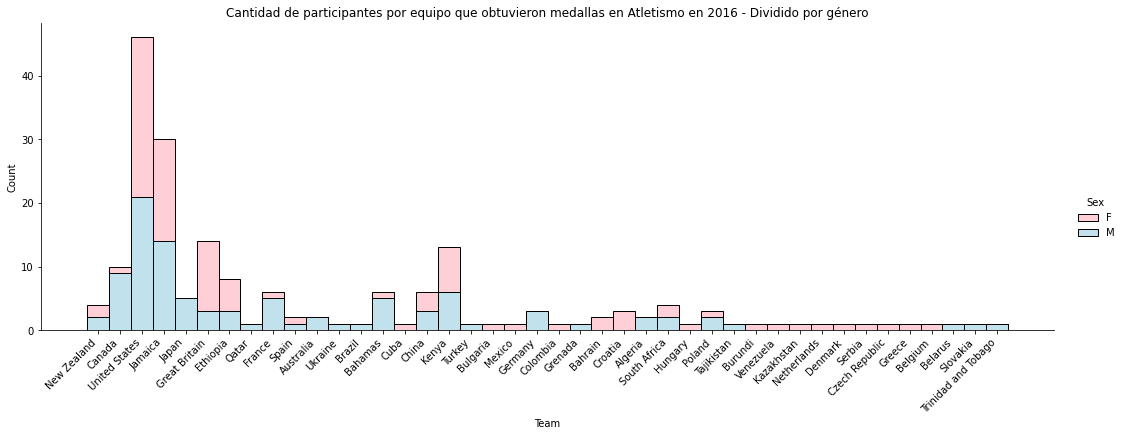

In [306]:
chart=sns.displot(data=mteam,x='Team',height=5,aspect=3,hue='Sex',multiple='stack',palette=('pink','lightblue'))
chart.set_xticklabels(rotation=45,horizontalalignment='right')
plt.title('Cantidad de participantes por equipo que obtuvieron medallas en Atletismo en 2016 - Dividido por género')


¿Qué países destacaron en esta disciplina llevando la mayor parte de las medallas?

 

In [307]:
mteam.drop(['Year','Sex','Name','Sport'], axis=1).groupby(['Team']).count().nlargest(n=5, columns=['Medal'])

,Medal
Team,
United States,46
Jamaica,30
Great Britain,14
Kenya,13
Canada,10


In [308]:
mteam.drop(['Year','Name','Sport'], axis=1).groupby(['Team','Sex']).count().nlargest(n=8, columns=['Medal'])

Medal
Team          Sex       
United States F       25
              M       21
Jamaica       F       16
              M       14
Great Britain F       11
Canada        M        9
Kenya         F        7
              M        6


 El primero de ellos fue Estados Unidos con 46 medallas, seguido por Jamaica con 30. En ambos casos está muy pareja la cantidad de hombres y mujeres del equipo que destacaron en el podio.

In [309]:
dfath=dfs[dfs.Sport=='Athletics']
fem_ath=dfath[dfath.Sex=='F']
fem_ath_2016=fem_ath[fem_ath.Year==2016]
fem_ath_2016=fem_ath_2016.fillna('0')
fem_ath_2016.head(2)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
493,273,Maizurah Abdul Rahim,F,17.0,147.0,50.0,Brunei,BRU,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 200 metres,0
944,533,Yelena Vasilyevna Abramchuk (Kopets-),F,28.0,182.0,95.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,0


Si se filtra solamente las deportistas femeninas de Atletismo del año 2016, surge el interrogante de si existe una relación entre el índice de masa corporal (ratio entre su altura y su peso) y la capacidad de destacarse en las distintas prácticas que comprende el atletismo.

Text(0.5, 1.0, 'Relación entre el índice de masa corporal (relación entre altura y peso) y la medallas obtenidas - Incluye sin medallas')

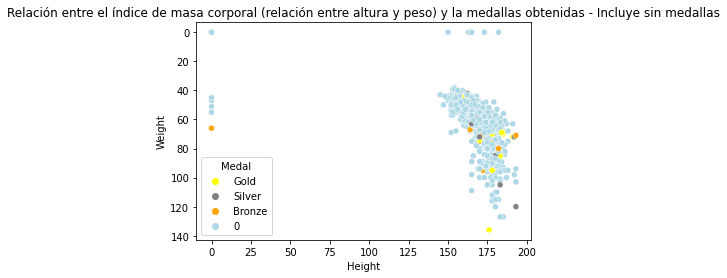

In [310]:
todo=sns.scatterplot(data=fem_ath_2016, x='Height',y='Weight',hue='Medal',hue_order=('Gold','Silver','Bronze','0'),palette=('yellow','grey','orange','lightblue'))
plt.title('Relación entre el índice de masa corporal (relación entre altura y peso) y la medallas obtenidas - Incluye sin medallas')


Se observa que, descartando algunos datos nulos tanto en peso como en altura, la mayor parte de las deportistas se encuentra distribuida en la misma zona de la gráfica, sin notarse ninguna diferencia entre las que obtuvieron medallas y las que no.

Text(0.5, 1.0, 'Relación entre el índice de masa corporal (relación entre altura y peso) y la medallas obtenidas - Solo participantes que obtuvieron medallas')

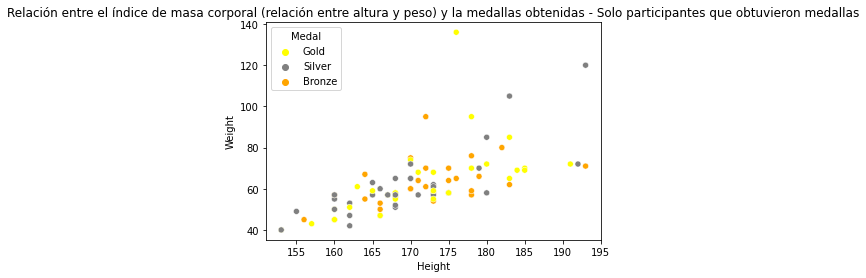

In [311]:
fem_ath_2016=fem_ath[fem_ath.Year==2016]
solomed=sns.scatterplot(data=fem_ath_2016, x='Height',y='Weight',hue='Medal',hue_order=('Gold','Silver','Bronze'),palette=('yellow','grey','orange'))
plt.title('Relación entre el índice de masa corporal (relación entre altura y peso) y la medallas obtenidas - Solo participantes que obtuvieron medallas')

Quitando las participaciones que no obtuvieron medalla, se observa claramente que las ganadoras de los podios presentan un rango muy variado de alturas y pesos.

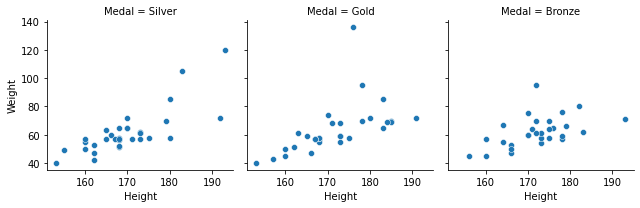

In [312]:
separado = sns.FacetGrid(fem_ath_2016, col="Medal")
separado.map(sns.scatterplot, 'Height','Weight')


Lo mismo se puede concluir si separamos las medallas según su jerarquía.

Como se ve en una de las gráficas anteriores, los países Estados Unidos, Jamaica, Gran Bretaña, Kenya, Etiopía y China se destacan con la mayor cantidad de corredoras que obtuvieron medallas. 

Surge de este análisis la pregunta: ¿la altura de las deportistas representa una ventaja para ellas? Estos 6 equipos exitosos, ¿tienen una distribución de alturas similar?

In [313]:
principales=fem_ath_2016.loc[(fem_ath_2016['Team']=='United States')|(fem_ath_2016['Team']=='Jamaica')|(fem_ath_2016['Team']=='China')|(fem_ath_2016['Team']=='Ethiopia')|(fem_ath_2016['Team']=='Great Britain')|(fem_ath_2016['Team']=='Kenya')]
principales

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3020,1682,Morolake Akinosun,F,22.0,163.0,61.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,Gold
4445,2537,Habitam Alemu,F,19.0,171.0,52.0,Ethiopia,ETH,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 800 metres,NaN
4727,2695,Nia Sifaatihii Ali,F,27.0,170.0,65.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres Hurdles,Silver
7426,4155,"Jessica ""Jess"" Andrews (-Martin)",F,23.0,168.0,52.0,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Women's 10,000 metres",NaN
8642,4747,Alice Aprot Nawowuna,F,22.0,152.0,54.0,Kenya,KEN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Women's 10,000 metres",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266662,133399,Yuan Qiqi,F,20.0,155.0,50.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres,NaN
266663,133399,Yuan Qiqi,F,20.0,155.0,50.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
266707,133423,Yue Chao,F,25.0,165.0,50.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Marathon,NaN
268944,134559,Zhang Wenxiu,F,30.0,183.0,105.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Hammer Throw,Silver


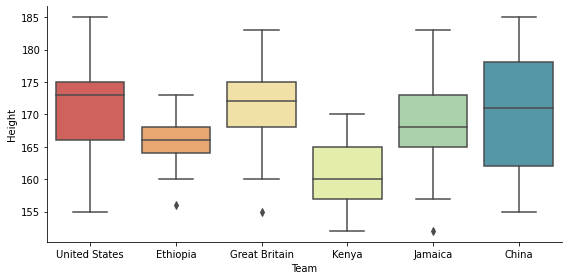

In [314]:
ax = sns.catplot(x="Team", y="Height", data=principales, palette='Spectral',height=4, aspect=2,kind='box')


El gráfico muestra distribuciones muy diversas de alturas e incluso valores atípicos. Por ende no se puede concluir que la altura haya sido determinante a la hora de obtener una buena perfomance en las disciplinas de atletismo femenino.

## **Construcción de Modelo Predictivo - Evaluación e interpretación de Métricas**

Se continuará investigando la relación entre las condiciones físicas de las competidoras de Atletismo Femenino y su probabilidad de obtener medallas, teniendo como input solamente la historia.

En primer lugar, se quitan del dataset las columnas poco relevantes en esta instancia y se reemplazan los valores nulos de altura, peso y edad por los promedios (el porcentaje de nulos es pequeño para el total de la muestra).

In [315]:
dfath=dfs[dfs.Sport=='Athletics']
fem_ath=dfath[dfath.Sex=='F']
fem_ath_feat=fem_ath.drop(['ID','Name','Sex','NOC','Season'],axis=1).reset_index(drop=True)
mean_w=fem_ath_feat.Weight.mean().round()
mean_h=fem_ath_feat.Height.mean().round()
mean_a=fem_ath_feat.Age.mean().round()
fem_ath_feat.Weight=fem_ath_feat.Weight.fillna(mean_w,inplace=False)
fem_ath_feat.Height=fem_ath_feat.Height.fillna(mean_h,inplace=False)
fem_ath_feat.Age=fem_ath_feat.Age.fillna(mean_a,inplace=False)
fem_ath_feat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11666 entries, 0 to 11665
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     11666 non-null  float64
 1   Height  11666 non-null  float64
 2   Weight  11666 non-null  float64
 3   Team    11666 non-null  object 
 4   Games   11666 non-null  object 
 5   Year    11666 non-null  int64  
 6   City    11666 non-null  object 
 7   Sport   11666 non-null  object 
 8   Event   11666 non-null  object 
 9   Medal   1275 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 911.5+ KB


In [316]:
y=fem_ath_feat.Medal.fillna('No Medal') #Construcción de y = target
y


0        No Medal
1        No Medal
2        No Medal
3        No Medal
4          Silver
           ...   
11661      Silver
11662    No Medal
11663      Bronze
11664      Bronze
11665      Silver
Name: Medal, Length: 11666, dtype: object

In [317]:
X=fem_ath_feat.drop('Medal',axis=1) #Construcción de X = todas las features
X


,Age,Height,Weight,Team,Games,Year,City,Sport,Event
0,18.0,168.0,60.0,Netherlands,1932 Summer,1932,Los Angeles,Athletics,Athletics Women's 100 metres
1,18.0,168.0,60.0,Netherlands,1932 Summer,1932,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay
2,24.0,168.0,65.0,Estonia,2004 Summer,2004,Athina,Athletics,Athletics Women's Javelin Throw
3,28.0,168.0,65.0,Estonia,2008 Summer,2008,Beijing,Athletics,Athletics Women's Javelin Throw
4,22.0,179.0,80.0,Russia,2008 Summer,2008,Beijing,Athletics,Athletics Women's Javelin Throw
...,...,...,...,...,...,...,...,...,...
11661,25.0,168.0,80.0,Soviet Union,1956 Summer,1956,Melbourne,Athletics,Athletics Women's Shot Put
11662,29.0,168.0,80.0,Soviet Union,1960 Summer,1960,Roma,Athletics,Athletics Women's Shot Put
11663,33.0,168.0,80.0,Soviet Union,1964 Summer,1964,Tokyo,Athletics,Athletics Women's Shot Put
11664,19.0,171.0,64.0,Russia,2000 Summer,2000,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay


### Feature Selection

#####Librerías y elección del método:

In [318]:
#@title
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

En primer lugar se busca predecir la obtención de medallas a partir de las carcterísticas físicas de la competidora. Para ello, se limitará el análisis a los Features: Altura, Peso y Edad.

Mediante el método de Selección Secuencial incluido en la librería Sklearn, se determina cuáles de los features influyen más significativamente en la obtención de una medalla.

En el conjunto target y2 se codifica el resultado de forma binaria:
- 1 = la atleta obtuvo una medalla
- 0 = la atleta no obtuvo una medalla

In [319]:
#@title
X2=X[['Height','Weight','Age']] #features físicos
#y2=y.replace('Gold',3).replace('Silver',2).replace('Bronze',1).replace('No Medal',0) #Coding para transformar Medal en números (secuencia ordinal)
y2=y.replace('Gold',1).replace('Silver',1).replace('Bronze',1).replace('No Medal',0) #Coding para transformar Medal en binario: 1=obtiene medalla , 0=no obtiene medalla


#####Feature Selection con KNeighborsClassifier

In [320]:
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=2)
sfs.fit(X2, y2)

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=2)

In [321]:
sfs.get_support()


array([ True, False,  True])

In [322]:
print(f"Features seleccionados con KNeighborsClassifier: {X2.columns[sfs.get_support()]}")

Features seleccionados con KNeighborsClassifier: Index(['Height', 'Age'], dtype='object')


#####Feature Selection con DecisionTreeClassifier

In [323]:
tree = DecisionTreeClassifier()
sfs = SequentialFeatureSelector(tree, n_features_to_select=2)
sfs.fit(X2, y2)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(),
                          n_features_to_select=2)

In [324]:
print(f"Features seleccionados con DecisionTreeClassifier: {X2.columns[sfs.get_support()]}")


Features seleccionados con DecisionTreeClassifier: Index(['Height', 'Age'], dtype='object')


Como conclusión, los features elegidos son **Altura** y **Edad**.

In [325]:
Xf=sfs.transform(X2)
Xf

array([[168.,  18.],
       [168.,  18.],
       [168.,  24.],
       ...,
       [168.,  33.],
       [171.,  19.],
       [171.,  23.]])

###Construcción, entrenamiento y testeo del Modelo

División de los datos en Train y Test

In [326]:
train_X, test_X, train_y, test_y= train_test_split(Xf,y2)

Definición del Modelo ▶ Clasificación con Árbol de Decisión


In [327]:
modelot=DecisionTreeClassifier()
modelot.fit(train_X,train_y)

DecisionTreeClassifier()

In [328]:
pred=modelot.predict(test_X)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

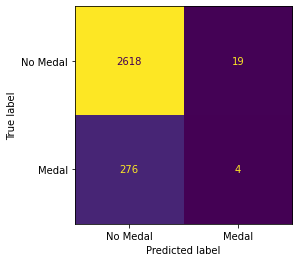

In [329]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelot, test_X, test_y, display_labels=['No Medal', 'Medal'],colorbar=False)

In [330]:
print(metrics.classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      2637
           1       0.17      0.01      0.03       280

    accuracy                           0.90      2917
   macro avg       0.54      0.50      0.49      2917
weighted avg       0.83      0.90      0.86      2917



A partir de la matriz de confusión se obtienen las siguientes conclusiones:
- Valores de Precisión, Sensibilidad y F1 muy cercanos a 0 para los positivos (Medal). 
- Valores aceptables para los negativos y para el Accuracy del modelo. Sin embargo, esto se debe al sesgo en los datos (un gran porcentaje de los registros es negativo, indefectiblemente el modelo acierta con verdaderos negativos pero falla al predecir los positivos)

Al correrlo nuevamente vemos que siempre tiende a tener muchos Falsos Negativos, por ende presenta un ALTO BIAS y una BAJA VARIANZA ya que los resultados no varían significativamente a pesar de repetir la divisón de la data en train y test. Por lo tanto, este modelo presenta **UNDERFITTING**.

Para contrarrestar el Underfitting y mejorar las predicciones, se incoporan al modelo las variables Peso (descartada en el paso de feature selection) y las variables categóricas Equipo y Evento

In [331]:
X3=X[['Height','Weight','Age','Team','Event']]


In [332]:
X4 = pd.get_dummies(X3, columns = ['Team','Event']) #Encoding de variables categóricas


In [333]:
train_X, test_X, train_y, test_y= train_test_split(X4,y2)

In [334]:
modelot2=DecisionTreeClassifier()
modelot2.fit(train_X,train_y)

DecisionTreeClassifier()

In [335]:
pred=modelot2.predict(test_X)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

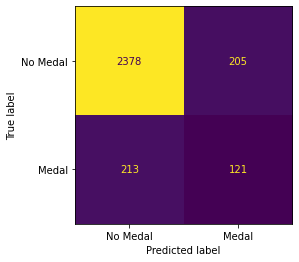

In [336]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelot2, test_X, test_y, display_labels=['No Medal', 'Medal'],colorbar=False)

In [337]:
print(metrics.classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2583
           1       0.37      0.36      0.37       334

    accuracy                           0.86      2917
   macro avg       0.64      0.64      0.64      2917
weighted avg       0.86      0.86      0.86      2917



Como se observa en las métricas, el modelo ha mejorado significativamente su capacidad de predicción. Presenta un Accuracy del 86% y las métricas para los valores positivos presentan mejores resultados. Se mejoró la situación de Underfitting ya que el modelo presenta menor bias.

Para continuar mejorando el desempeño del modelo, se evalúa el impacto de incorporar una variable más.

In [338]:
X5=X[['Height','Weight','Age','Team','Event','Year']]


In [339]:
X6 = pd.get_dummies(X5, columns = ['Team','Event']) #Encoding de variables categóricas


In [340]:
train_X, test_X, train_y, test_y= train_test_split(X6,y2)

In [341]:
modelot3=DecisionTreeClassifier()
modelot3.fit(train_X,train_y)

DecisionTreeClassifier()

In [342]:
pred=modelot3.predict(test_X)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

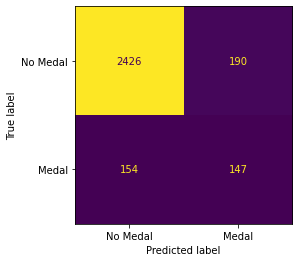

In [343]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelot3, test_X, test_y, display_labels=['No Medal', 'Medal'],colorbar=False)

In [344]:
print(metrics.classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2616
           1       0.44      0.49      0.46       301

    accuracy                           0.88      2917
   macro avg       0.69      0.71      0.70      2917
weighted avg       0.89      0.88      0.88      2917



Se mejoró el Accuracy, tomando el mismo un valor del 88%. La incorporación del feature mejoró además los valores de Precisión, Sensibilidad y F1 tanto para positivos como para negativos.

###Conclusiones

Como conclusión, la historia del atletismo femenino no permite predecir con precisión qué competidoras ganarán medallas.
 
Con el fin de lograr un análisis más acertado, se incoporan a continuación datos sobre el contexto socio-económico de las participantes.


#Segunda parte: Incoporación del contexto socio-económico

####Dataset

In [345]:
pip install wbgapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [346]:
import wbgapi as wb

La API da acceso a información que trata los siguientes temas y está compuesta por las siguientes bases de datos

In [347]:
wb.topic.info()


id,value
1,Agriculture & Rural Development
2,Aid Effectiveness
3,Economy & Growth
4,Education
5,Energy & Mining
6,Environment
7,Financial Sector
8,Health
9,Infrastructure
10,Social Protection & Labor


In [348]:
#wb.source.info()

Provee información del siguiente listado de países y los clasifica en función de su Nivel de Ingresos y Región a la que pertenecen (ver referencias de nivel de ingresos y regiones). 

Argentina, por ejemplo, está clasificada como Región LCN y Nivel de Ingresos UMC

In [349]:
wb.economy.info()

id,value,region,incomeLevel
ABW,Aruba,LCN,HIC
AFE,Africa Eastern and Southern,,
AFG,Afghanistan,SAS,LIC
AFW,Africa Western and Central,,
AGO,Angola,SSF,LMC
ALB,Albania,ECS,UMC
AND,Andorra,ECS,HIC
ARB,Arab World,,
ARE,United Arab Emirates,MEA,HIC
ARG,Argentina,LCN,UMC


In [350]:
wb.economy.get('ARG')

{'id': 'ARG',
 'value': 'Argentina',
 'aggregate': False,
 'longitude': -58.4173,
 'latitude': -34.6118,
 'region': 'LCN',
 'adminregion': 'LAC',
 'lendingType': 'IBD',
 'incomeLevel': 'UMC',
 'capitalCity': 'Buenos Aires'}

In [351]:
#Referencias Nivel de Ingresos
wb.income.info()


id,value
HIC,High income
INX,Not classified
LIC,Low income
LMC,Lower middle income
LMY,Low & middle income
MIC,Middle income
UMC,Upper middle income
,7 elements


In [352]:
#Referencias de Región, filtrando la región de Argentina
wb.region.info('LCN')

code,name
LCN,Latin America & Caribbean
,1 elements


**Relevancia:** Esta información puede permitirnos establecer una relación entre la probabilidad de una competidora de obtener una medalla y su background.

En este camino, podemos adentrarnos en las estadísticas económicas, de educación, de género y ambientales que permitan investigar si existen condiciones que predispongan a los deportistas a ser competidores de élite. 

## Selección de un Indicador y Proceso de Data Wrangling





Como se mencionó en el apartado "Problema Comercial", se busca evaluar desde una perspectiva de género qué situaciones que condicionan la vida y el desarrollo de las mujeres alrededor del mundo pueden ser condicionantes a la hora de perseguir una carrera como deportistas de alto rendimiento.

Para ello se trabajará con la base de datos número 17: **"Gender"** :

Se seleccionó el indicador **"SP.ADO.TFRT - Adolescent fertility rate (births per 1,000 women ages 15-19)"** y se construyó un DataFrame al cual se le hará la correspondiente limpieza y ordenamiento. 

In [353]:
#fr=wb.data.DataFrame(['SP.ADO.TFRT'],time=range(1990,2020,2),labels=True).reset_index()
fr=wb.data.DataFrame(['SP.ADO.TFRT'],labels=True).reset_index()
fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 64 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   economy  266 non-null    object 
 1   Country  266 non-null    object 
 2   YR1960   242 non-null    float64
 3   YR1961   242 non-null    float64
 4   YR1962   242 non-null    float64
 5   YR1963   242 non-null    float64
 6   YR1964   242 non-null    float64
 7   YR1965   242 non-null    float64
 8   YR1966   242 non-null    float64
 9   YR1967   242 non-null    float64
 10  YR1968   242 non-null    float64
 11  YR1969   242 non-null    float64
 12  YR1970   242 non-null    float64
 13  YR1971   242 non-null    float64
 14  YR1972   242 non-null    float64
 15  YR1973   242 non-null    float64
 16  YR1974   242 non-null    float64
 17  YR1975   242 non-null    float64
 18  YR1976   242 non-null    float64
 19  YR1977   242 non-null    float64
 20  YR1978   242 non-null    float64
 21  YR1979   242 non

In [354]:
sum(fr.isnull().sum())

1730

In [355]:
print(fr.shape)
fr= fr.drop_duplicates()
print(fr.shape)

(266, 64)
(266, 64)


El Data Frame consiste en 52 columnas 266 filas. Contiene en total 1730 valores nulos. No tiene líneas duplicadas.

In [356]:
fr.isnull().sum().sort_values(ascending=False)

YR2021     266
YR2006      24
YR1993      24
YR1994      24
YR1995      24
          ... 
YR1987      24
YR1988      24
YR1961      24
Country      0
economy      0
Length: 64, dtype: int64

El año 2021 no tiene ningún registro no nulo por ende se retira del data frame. 

Para el resto de los años hay 24 líneas con registros nulos, se analiza cuáles son a continuación.

In [357]:
fr_=fr.drop('YR2021', axis=1)

In [358]:
nuls=fr_.isnull().sum(axis=1).sort_values(ascending=False)
nulsc= pd.Series(nuls,name='NullCount')
nulsc

fr_1=pd.merge(fr_,nulsc,how= 'left',left_index=True,right_index=True)
fr_1
fr_1.loc[fr_1['NullCount'] > 0][['economy', 'Country','NullCount']]

,economy,Country,NullCount
15,TUV,Tuvalu,61
16,TCA,Turks and Caicos Islands,61
33,MAF,St. Martin (French part),61
35,KNA,St. Kitts and Nevis,61
44,SXM,Sint Maarten (Dutch part),61
52,SMR,San Marino,61
66,PLW,Palau,61
70,MNP,Northern Mariana Islands,61
79,NRU,Nauru,61
86,MCO,Monaco,61


Se construye tabla con países con conteo de valores nulos mayor a cero y se evalúan los casos. Son relevantes estos países o regiones para nuestro Problema Comercial? 
La respuesta es no, ya que los mismos no registran participaciones en los Juego Olípimpicos.

Por ende, podemos descartar las filas con valores nulos.

In [359]:
fr_2=fr_1.loc[fr_1['NullCount'] == 0].drop('NullCount',axis=1)
fr_2

,economy,Country,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,...,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
0,ZWE,Zimbabwe,168.873600,170.284800,171.696000,172.166400,172.636800,173.107200,173.577600,174.048000,...,109.292600,108.843000,104.301400,99.759800,95.218200,90.676600,86.135000,83.248600,80.362200,77.475800
1,ZMB,Zambia,185.156400,187.031200,188.906000,189.368000,189.830000,190.292000,190.754000,191.216000,...,139.148600,136.696000,133.379200,130.062400,126.745600,123.428800,120.112000,118.304800,116.497600,114.690400
2,YEM,"Yemen, Rep.",166.734000,168.455000,170.176000,172.734600,175.293200,177.851800,180.410400,182.969000,...,69.457600,67.672000,66.208000,64.744000,63.280000,61.816000,60.352000,59.162400,57.972800,56.783200
3,PSE,West Bank and Gaza,111.260000,113.026000,114.792000,114.789400,114.786800,114.784200,114.781600,114.779000,...,61.799000,60.792000,59.186800,57.581600,55.976400,54.371200,52.766000,51.882800,50.999600,50.116400
4,VIR,Virgin Islands (U.S.),152.158000,150.614000,149.070000,153.877600,158.685200,163.492800,168.300400,173.108000,...,46.514600,45.747000,42.375000,39.003000,35.631000,32.259000,28.887000,27.648200,26.409400,25.170600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,CEB,Central Europe and the Baltics,46.334285,45.751458,45.021409,45.195871,45.312144,45.381029,45.502559,45.750326,...,21.063575,20.709850,20.512769,20.350292,20.184451,19.987625,19.789550,19.530487,19.226590,18.905388
262,CSS,Caribbean small states,147.805120,147.985940,148.107239,146.429594,144.620381,142.720643,140.854275,139.022970,...,59.231493,57.498768,56.287650,55.035206,53.724666,52.384066,51.034565,49.789896,48.558001,47.351108
263,ARB,Arab World,134.896420,135.526616,136.191081,135.972705,135.674158,135.229157,134.637877,133.974070,...,50.026583,49.890809,49.290735,48.648198,48.024790,47.372049,46.536682,45.715379,44.828962,43.996216
264,AFW,Africa Western and Central,172.976205,172.916957,172.837060,172.548397,172.253558,171.978457,171.693150,171.395550,...,123.484372,122.115587,120.274758,118.422680,116.544431,114.640222,112.715754,110.855472,109.005705,107.166163


##Detección de Outliers

En primer lugar, se revisa la data de forma unidimensional para entender si hay valores extremos.

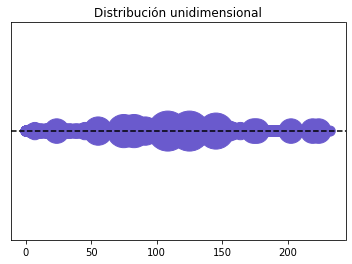

In [360]:
datos = fr_2.drop(['economy','Country'],axis=1).to_numpy()

dat_uniq, counts = np.unique(datos, return_counts=True)
sizes = counts*100
colors = ['slateblue']*len(dat_uniq)
#colors[-1] = 'red'
 
plt.axhline(1, color='k', linestyle='--')
plt.scatter(dat_uniq, np.ones(len(dat_uniq)), s=sizes, color=colors)
plt.yticks([])
plt.title('Distribución unidimensional')
plt.show()

No se observan outliers desde este enfoque.

<ipython-input-361-c38f0292b1f5>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  media_=pd.DataFrame(fr_2.drop(['Country'],axis=1).mean())


[Text(0, 0, '1960'),
 Text(0, 0, '1961'),
 Text(0, 0, '1962'),
 Text(0, 0, '1963'),
 Text(0, 0, '1964'),
 Text(0, 0, '1965'),
 Text(0, 0, '1966'),
 Text(0, 0, '1967'),
 Text(0, 0, '1968'),
 Text(0, 0, '1969'),
 Text(0, 0, '1970'),
 Text(0, 0, '1971'),
 Text(0, 0, '1972'),
 Text(0, 0, '1973'),
 Text(0, 0, '1974'),
 Text(0, 0, '1975'),
 Text(0, 0, '1976'),
 Text(0, 0, '1977'),
 Text(0, 0, '1978'),
 Text(0, 0, '1979'),
 Text(0, 0, '1980'),
 Text(0, 0, '1981'),
 Text(0, 0, '1982'),
 Text(0, 0, '1983'),
 Text(0, 0, '1984'),
 Text(0, 0, '1985'),
 Text(0, 0, '1986'),
 Text(0, 0, '1987'),
 Text(0, 0, '1988'),
 Text(0, 0, '1989'),
 Text(0, 0, '1990'),
 Text(0, 0, '1991'),
 Text(0, 0, '1992'),
 Text(0, 0, '1993'),
 Text(0, 0, '1994'),
 Text(0, 0, '1995'),
 Text(0, 0, '1996'),
 Text(0, 0, '1997'),
 Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '

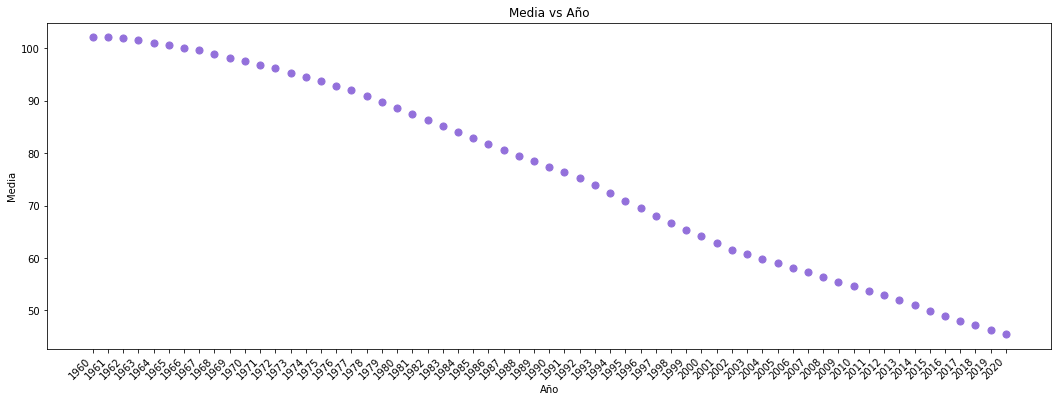

In [361]:
#Quitar "YR" a las columnas y obtener solo el nro del año
yrs=list(fr_2.columns)
yrsnum=['economy','Country']
for i in (range(2,len(yrs))):
  st=yrs[i]
  s=st[-4:]
  yrsnum=yrsnum+[s]

fr_2.columns=yrsnum

#Calcula la Media
media_=pd.DataFrame(fr_2.drop(['Country'],axis=1).mean())

media_.columns=(['Media'])
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(media_.index,media_.Media, s=50, color='mediumpurple')
ax.set_title('Media vs Año') 
ax.set_ylabel('Media')
ax.set_xlabel('Año')
ax.set_xticks(media_.index)
ax.set_xticklabels(media_.index,rotation=45,horizontalalignment='right')


En el gráfico anterior se puede observar que la media anual del indicador a seguido una tendencia de disminución constante, sin denotar variaciones drásticas año a año. Podemos concluir entonces que no hay valores extremos o mediciones erróneas que estén influyendo en el cálculo de la media.

#Merge de la Data

Tomamos la historia de atletismo dede 1990 hasta 2016 y la cruzamos con la media del indicador para cada pais de 1990 en adelante.

In [362]:
ath_90_=fem_ath.loc[fem_ath.Year>1990].drop(['ID','Name','Sex','Games','City','Sport'],axis=1)
medal=ath_90_.Medal.fillna('No Medal')
ath_90_['Medal2']=medal
ath_90=ath_90_.drop(['Medal'],axis=1)
ath_90

,Age,Height,Weight,Team,NOC,Year,Season,Event,Medal2
135,24.0,168.0,65.0,Estonia,EST,2004,Summer,Athletics Women's Javelin Throw,No Medal
136,28.0,168.0,65.0,Estonia,EST,2008,Summer,Athletics Women's Javelin Throw,No Medal
163,22.0,179.0,80.0,Russia,RUS,2008,Summer,Athletics Women's Javelin Throw,Silver
164,26.0,179.0,80.0,Russia,RUS,2012,Summer,Athletics Women's Javelin Throw,No Medal
202,35.0,155.0,43.0,Greece,GRE,2004,Summer,Athletics Women's Marathon,No Medal
...,...,...,...,...,...,...,...,...,...
271053,23.0,174.0,62.0,Kazakhstan,KAZ,2016,Summer,Athletics Women's 100 metres,No Medal
271054,23.0,174.0,62.0,Kazakhstan,KAZ,2016,Summer,Athletics Women's 200 metres,No Medal
271055,23.0,174.0,62.0,Kazakhstan,KAZ,2016,Summer,Athletics Women's 4 x 100 metres Relay,No Medal
271102,19.0,171.0,64.0,Russia,RUS,2000,Summer,Athletics Women's 4 x 400 metres Relay,Bronze


In [363]:
#drop de las columnas anteriores a 1990
fr_3_=fr_2.drop(fr_2.loc[:,'1960':'1989'].columns, axis=1).T
fr_3=fr_3_.rename(columns=fr_3_.iloc[0])
medxpais=fr_3.drop(['economy','Country'],axis=0).mean()
medxpais.name='Medxpais'
medxpais
#df.rename(columns=df.iloc[0]).drop(df.index[0])

ZWE    100.637316
ZMB    146.070039
YEM     90.180503
PSE     75.049639
VIR     51.628077
          ...    
CEB     25.157834
CSS     67.661322
ARB     54.118004
AFW    131.166465
AFE    113.711490
Name: Medxpais, Length: 242, dtype: float64

####Join de ambos DataFrames

In [364]:
#dataframe banco medxpais
#dataframe atletismo ath_90
ath_90.NOC.value_counts()

USA    460
RUS    327
GER    278
GBR    270
UKR    238
      ... 
SMR      1
AHO      1
KOS      1
SSD      1
KUW      1
Name: NOC, Length: 209, dtype: int64

In [365]:
data_fert_media=pd.merge(ath_90,medxpais,how='left',left_on='NOC',right_index=True).reset_index(drop=True)
data_fert_media.head()

,Age,Height,Weight,Team,NOC,Year,Season,Event,Medal2,Medxpais
0,24.0,168.0,65.0,Estonia,EST,2004,Summer,Athletics Women's Javelin Throw,No Medal,23.851600
1,28.0,168.0,65.0,Estonia,EST,2008,Summer,Athletics Women's Javelin Throw,No Medal,23.851600
2,22.0,179.0,80.0,Russia,RUS,2008,Summer,Athletics Women's Javelin Throw,Silver,31.254148
3,26.0,179.0,80.0,Russia,RUS,2012,Summer,Athletics Women's Javelin Throw,No Medal,31.254148
4,35.0,155.0,43.0,Greece,GRE,2004,Summer,Athletics Women's Marathon,No Medal,NaN


####Limpieza de la data

In [366]:
data_fert_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7060 entries, 0 to 7059
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       7055 non-null   float64
 1   Height    6921 non-null   float64
 2   Weight    6922 non-null   float64
 3   Team      7060 non-null   object 
 4   NOC       7060 non-null   object 
 5   Year      7060 non-null   int64  
 6   Season    7060 non-null   object 
 7   Event     7060 non-null   object 
 8   Medal2    7060 non-null   object 
 9   Medxpais  5347 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 551.7+ KB


Se observa que la columna Medxpais contiene valores nulos, es decir que puede tratarse de países no comprendidos en las estadísticas del Banco Mundial o escritos de otra manera.

In [367]:
nulos=data_fert_media.loc[data_fert_media.Medxpais.isna()]
nulos.NOC.value_counts()

GER    278
NGR    124
GRE    123
POR     93
BUL     78
      ... 
UAE      2
KOS      1
SMR      1
AHO      1
KUW      1
Name: NOC, Length: 96, dtype: int64

Se revisa país por país por ejemplo en el caso de Alemania (Germany) en el Banco Mundial figura como DEU y en la historia de los JJOO figura como GER. Se realiza el cambio para todos los países con 18 o más eventos registrados.

In [368]:
fr_2.loc[(fr_2.Country=='Germany')|(fr_2.Country=='Barbados')|(fr_2.Country=='Puerto Rico')|(fr_2.Country=='Latvia')|(fr_2.Country=='Bulgaria')|(fr_2.Country=='Netherlands')|(fr_2.Country=='Switzerland')|(fr_2.Country=='South Africa')]

,economy,Country,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
28,CHE,Switzerland,18.0118,18.7704,19.529,20.0324,20.5358,21.0392,21.5426,22.046,...,3.7022,3.503,3.3550,3.2070,3.0590,2.9110,2.763,2.6438,2.5246,2.4054
39,ZAF,South Africa,79.2902,80.5886,81.887,83.2388,84.5906,85.9424,87.2942,88.646,...,71.0324,71.976,71.1624,70.3488,69.5352,68.7216,67.908,67.8488,67.7896,67.7304
58,PRI,Puerto Rico,106.9978,104.8814,102.765,99.6466,96.5282,93.4098,90.2914,87.173,...,46.5956,45.594,42.2948,38.9956,35.6964,32.3972,29.098,28.3068,27.5156,26.7244
77,NLD,Netherlands,17.9102,18.8006,19.691,20.0906,20.4902,20.8898,21.2894,21.689,...,4.6172,4.448,4.3160,4.1840,4.0520,3.9200,3.788,3.7028,3.6176,3.5324
107,LVA,Latvia,18.5598,19.1044,19.649,20.3250,21.0010,21.6770,22.3530,23.029,...,15.8630,15.289,15.4654,15.6418,15.8182,15.9946,16.171,15.8014,15.4318,15.0622
143,DEU,Germany,37.8706,40.1368,42.403,43.7524,45.1018,46.4512,47.8006,49.150,...,8.4046,8.063,8.0694,8.0758,8.0822,8.0886,8.095,7.8568,7.6186,7.3804
187,BGR,Bulgaria,67.6630,68.9190,70.175,70.0762,69.9774,69.8786,69.7798,69.681,...,44.2464,43.756,42.9768,42.1976,41.4184,40.6392,39.860,39.3266,38.7932,38.2598
200,BRB,Barbados,124.9270,121.5520,118.177,114.5556,110.9342,107.3128,103.6914,100.070,...,43.6332,42.709,40.8772,39.0454,37.2136,35.3818,33.550,31.1302,28.7104,26.2906


In [369]:
ath_90_ok=ath_90.replace(['GER','SRI','CRO','LAT','SLO','POR','NGR','GRE','BUL','NED','SUI','RSA','ALG','ANT','MAD','PUR','DEN','BAR'],['DEU','LKA','HRV','LVA','SVN','PRT','NGA','GRC','BGR','NLD','CHE','ZAF','DZA','ATG','MDG','PRI','DNK','BRB'])
data_fert_media_ok=pd.merge(ath_90_ok,medxpais,how='left',left_on='NOC',right_index=True).reset_index(drop=True)
nulos_ok=data_fert_media_ok.loc[data_fert_media_ok.Medxpais.isna()]
nulos_ok.NOC.value_counts().head(10)


BAH    72
EUN    59
ISV    22
SCG    19
SKN    17
VIE    12
TPE    12
LES    12
GRN    10
GUA     9
Name: NOC, dtype: int64

In [370]:
paisdist=nulos.Team.unique()
paisdist

array(['Greece', 'Brunei', 'Nigeria', 'Palestine', 'Saudi Arabia',
       'Seychelles', 'Nicaragua', 'Algeria', 'Samoa', 'Bangladesh',
       'Oman', 'Kuwait', 'Fiji', 'Vanuatu', 'Mauritius', 'Sudan',
       'Saint Vincent and the Grenadines', 'Libya', 'Niger', 'Chad',
       'Individual Olympic Athletes', 'Portugal', 'Sri Lanka', 'Bahamas',
       'Germany', 'Bulgaria', 'Equatorial Guinea', 'Switzerland',
       'Unified Team', 'Mauritania', 'Mongolia', 'Barbados', 'Togo',
       'Congo (Brazzaville)', 'Grenada', 'Gambia',
       'Saint Kitts and Nevis', 'Denmark', 'Croatia', 'Lebanon',
       'United States Virgin Islands', 'Honduras', 'Latvia', 'Nepal',
       'Slovenia', 'Netherlands', 'South Africa', 'Botswana', 'Uruguay',
       'Philippines', 'Zambia', 'Paraguay', 'Guinea Bissau',
       'Puerto Rico', 'Angola', 'Cambodia', 'Malawi',
       'Antigua and Barbuda', 'Chinese Taipei', 'Myanmar',
       'Serbia and Montenegro', 'El Salvador', 'Guatemala',
       'Marshall Islands', '

Bahamas, Unified Team, United States Virgin Islands, Serbia and Montenegro no tiene data socioeconómica registrada.

In [371]:
ath_90.loc[(ath_90.NOC=='BAR')]

,Age,Height,Weight,Team,NOC,Year,Season,Event,Medal2
12661,25.0,183.0,70.0,Barbados,BAR,2008,Summer,Athletics Women's 100 metres,No Medal
12662,25.0,183.0,70.0,Barbados,BAR,2008,Summer,Athletics Women's 200 metres,No Medal
17296,26.0,169.0,54.0,Barbados,BAR,2016,Summer,Athletics Women's 100 metres Hurdles,No Medal
18241,20.0,178.0,59.0,Barbados,BAR,2016,Summer,Athletics Women's 400 metres Hurdles,No Medal
22835,24.0,167.0,59.0,Barbados,BAR,2000,Summer,Athletics Women's 400 metres Hurdles,No Medal
22836,24.0,167.0,59.0,Barbados,BAR,2000,Summer,Athletics Women's 4 x 400 metres Relay,No Medal
22837,28.0,167.0,59.0,Barbados,BAR,2004,Summer,Athletics Women's 400 metres Hurdles,No Medal
60165,25.0,170.0,71.0,Barbados,BAR,2000,Summer,Athletics Women's 100 metres,No Medal
60166,25.0,170.0,71.0,Barbados,BAR,2000,Summer,Athletics Women's 200 metres,No Medal
109984,21.0,186.0,77.0,Barbados,BAR,2016,Summer,Athletics Women's High Jump,No Medal


In [372]:
#DataFrame final
data_fert_media_ok.head()

,Age,Height,Weight,Team,NOC,Year,Season,Event,Medal2,Medxpais
0,24.0,168.0,65.0,Estonia,EST,2004,Summer,Athletics Women's Javelin Throw,No Medal,23.851600
1,28.0,168.0,65.0,Estonia,EST,2008,Summer,Athletics Women's Javelin Throw,No Medal,23.851600
2,22.0,179.0,80.0,Russia,RUS,2008,Summer,Athletics Women's Javelin Throw,Silver,31.254148
3,26.0,179.0,80.0,Russia,RUS,2012,Summer,Athletics Women's Javelin Throw,No Medal,31.254148
4,35.0,155.0,43.0,Greece,GRC,2004,Summer,Athletics Women's Marathon,No Medal,11.166368


Chequeamos que el dataframe no contenga valores nulos y si los hay, los quitamos o imputamos.

In [373]:
data_fert_media_ok.isna().sum()

Age           5
Height      139
Weight      138
Team          0
NOC           0
Year          0
Season        0
Event         0
Medal2        0
Medxpais    591
dtype: int64

In [374]:
data_fert_media_ok.Medxpais.fillna(data_fert_media_ok.Medxpais.mean(),inplace=True)
data_fert_media_ok.isna().sum()
data_fert_media_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7060 entries, 0 to 7059
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       7055 non-null   float64
 1   Height    6921 non-null   float64
 2   Weight    6922 non-null   float64
 3   Team      7060 non-null   object 
 4   NOC       7060 non-null   object 
 5   Year      7060 non-null   int64  
 6   Season    7060 non-null   object 
 7   Event     7060 non-null   object 
 8   Medal2    7060 non-null   object 
 9   Medxpais  7060 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 551.7+ KB


In [375]:
data_fert_media_ok2=data_fert_media_ok.dropna()
data_fert_media_ok2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6908 entries, 0 to 7059
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       6908 non-null   float64
 1   Height    6908 non-null   float64
 2   Weight    6908 non-null   float64
 3   Team      6908 non-null   object 
 4   NOC       6908 non-null   object 
 5   Year      6908 non-null   int64  
 6   Season    6908 non-null   object 
 7   Event     6908 non-null   object 
 8   Medal2    6908 non-null   object 
 9   Medxpais  6908 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 593.7+ KB


####EDA

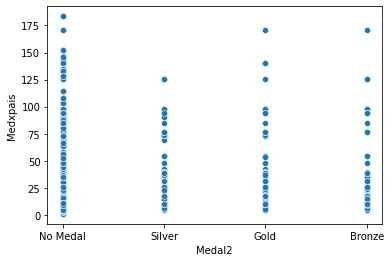

In [376]:
sns.scatterplot(data=data_fert_media_ok2,x='Medal2',y='Medxpais')

[Text(0.5, 1.0, 'Fertilidad adolescente media')]

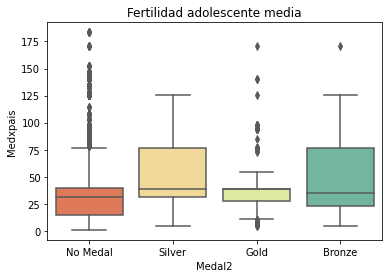

In [377]:
sns.boxplot(data=data_fert_media_ok2,y='Medxpais',x='Medal2',palette='Spectral').set(title="Fertilidad adolescente media")


In [378]:
data_fert_media_ok2.groupby('Medal2').mean().Medxpais

Medal2
Bronze      44.202898
Gold        41.066603
No Medal    35.868498
Silver      47.177576
Name: Medxpais, dtype: float64

In [379]:
data_fert_media_ok2.groupby('Medal2').describe()['Medxpais']

,count,mean,std,min,25%,50%,75%,max
Medal2,,,,,,,,
Bronze,199.0,44.202898,33.889688,4.480097,22.967252,35.021271,76.258045,170.766781
Gold,210.0,41.066603,26.941533,4.480097,27.791655,39.132161,39.132161,170.766781
No Medal,6285.0,35.868498,30.441237,0.872077,14.296271,31.254148,39.549348,183.536355
Silver,214.0,47.177576,29.027349,4.480097,31.254148,39.132161,76.258045,125.562116


Observando la gráfica y la distribución del indicador de fertilidad en adolescentes, podemos concluir que esta característica en el background de las participantes no las condiciona a la hora de obtener medallas. Intuitivamente, pensaríamos que una mayor fertilidad adolescente implicaría menores probabilidades de convertirse en deportistas de élite. Sin embargo, puede verse que en las participantes que no obtuvieron medallas, el promedio del indicador es menor, mientras que en las que sí obtuvieron medallas, los promedios son mayores y la distribución de valores es bastante amplia, contando incluso con algunos valores atípicamente altos en la categoría "Medalla de Oro".


## Modelo Predictivo incluyendo indicador socioeconómico

A pesar de no observar una conexión clara entre la información histrórica, las características socioeconómicas y la probabilidad de obtener medallas, se sigue trabajando en mejorar el modelo predictivo desarrollado previamente.

In [380]:
Xaprev=data_fert_media_ok2.drop(['Medal2','NOC','Season','Event'],axis=1)
Xa=pd.get_dummies(Xaprev)
ya=data_fert_media_ok2.Medal2.replace('Gold',3).replace('Silver',2).replace('Bronze',1).replace('No Medal',0) #Coding para transformar Medal en números (secuencia ordinal)

In [381]:
X_train, X_test, y_train, y_test = train_test_split(Xa, ya, test_size=0.33, random_state=42)

▶ Clasificación con Árbol de Decisión


In [382]:
modelotree=DecisionTreeClassifier()
modelotree.fit(X_train,y_train)

DecisionTreeClassifier()

In [383]:
predtree=modelotree.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

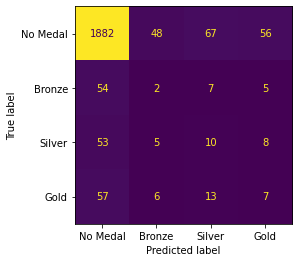

In [384]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelotree, X_test, y_test, display_labels=['No Medal','Bronze','Silver','Gold'],colorbar=False)

In [385]:
print(metrics.accuracy_score(y_test,predtree))

0.8337719298245614


In [386]:
print(metrics.classification_report(y_test, predtree))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2053
           1       0.03      0.03      0.03        68
           2       0.10      0.13      0.12        76
           3       0.09      0.08      0.09        83

    accuracy                           0.83      2280
   macro avg       0.29      0.29      0.29      2280
weighted avg       0.84      0.83      0.83      2280



Si comparamos los resultados contra los obtenidos cuando solo se utilizó la historia y no se tuvieron encuenta los distintos tipos de medallas, no observamos una mejoría en la detección de valores positivos. Por ende, la incorporación del indicador socioeconómico no mejoró la performance del modelo ni la predicción de ganadoras. 

# Balanceo y Feature Selection

### Balanceo del Dataset

La mala performance del modelo se debe en parte a que la data se encuentra desbalanceada. A continuación, se implementará la técnica "Random Oversampling" para generar registros sintéticos de la clase que se presenta en menor proporción en la data y así balancearla.

In [387]:
# import library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=42)

# fit predictor and target 
X_ros, y_ros = ros.fit_resample(Xa, ya)

print('Original dataset shape', Counter(ya))
print('Resample dataset shape', Counter(y_ros))


Original dataset shape Counter({0: 6285, 2: 214, 3: 210, 1: 199})
Resample dataset shape Counter({0: 6285, 2: 6285, 3: 6285, 1: 6285})


▶ Clasificación con Árbol de Decisión - Dataset Balanceado


In [388]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, random_state=42)

In [389]:
modelotree_ros=DecisionTreeClassifier()
modelotree_ros.fit(X_train_ros,y_train_ros)

DecisionTreeClassifier()

In [390]:
predtree_ros=modelotree_ros.predict(X_test_ros)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

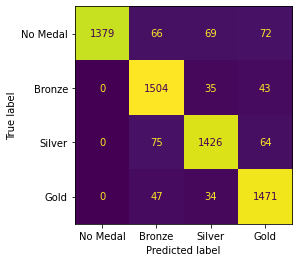

In [391]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelotree_ros, X_test_ros, y_test_ros, display_labels=['No Medal','Bronze','Silver','Gold'],colorbar=False)

In [392]:
print(metrics.accuracy_score(y_test_ros,predtree_ros))

0.9196499602227526


In [393]:
print(metrics.classification_report(y_test_ros, predtree_ros))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1586
           1       0.89      0.95      0.92      1582
           2       0.91      0.91      0.91      1565
           3       0.89      0.95      0.92      1552

    accuracy                           0.92      6285
   macro avg       0.92      0.92      0.92      6285
weighted avg       0.92      0.92      0.92      6285



Se puede observar una gran mejoría en la performance del modelo.

### Feature Selection 

El dataset con las variables categóricas transformadas a numéricas tiene 213 columnas. Se busca poner en la misma escala y reducir la cantidad de variables para agilizar y mejorar la performance del modelo. 

In [394]:
Xa.head(3)

,Age,Height,Weight,Year,Medxpais,Team_Afghanistan,Team_Albania,Team_Algeria,Team_American Samoa,Team_Andorra,...,Team_United States,Team_United States Virgin Islands,Team_Uruguay,Team_Uzbekistan,Team_Vanuatu,Team_Venezuela,Team_Vietnam,Team_Yemen,Team_Zambia,Team_Zimbabwe
0,24.0,168.0,65.0,2004,23.851600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28.0,168.0,65.0,2008,23.851600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22.0,179.0,80.0,2008,31.254148,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Aplicamos Standard Scaler y PCA a dataset con Random Oversampling

In [395]:
from sklearn.preprocessing import StandardScaler
Xstd = StandardScaler().fit_transform(X_ros)

In [396]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Xstd)
Xpca= pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

In [397]:
ya

0       0
1       0
2       2
3       0
4       0
       ..
7055    0
7056    0
7057    0
7058    1
7059    2
Name: Medal2, Length: 6908, dtype: int64

In [398]:
Xpca

,PC1,PC2
0,-0.398000,-0.018933
1,-0.467753,-0.046841
2,-1.617090,0.991108
3,-1.686842,0.963200
4,0.477945,-2.465738
...,...,...
25135,-0.185543,-0.410039
25136,-1.031745,0.189542
25137,-2.651847,1.323019
25138,1.460604,1.075064


In [399]:
finalDf = pd.concat([Xpca, y_ros], axis = 1)

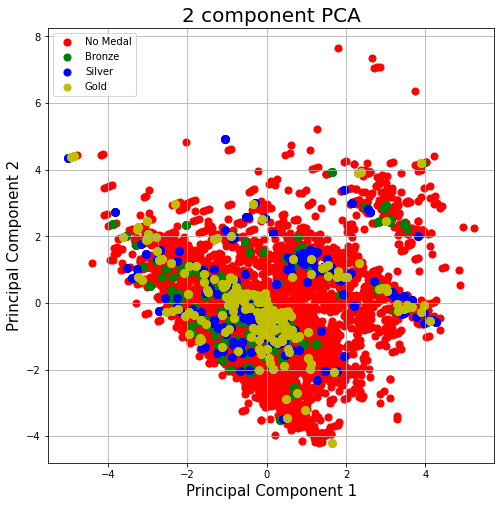

In [400]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2,3]
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Medal2'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(['No Medal','Bronze','Silver','Gold'])
ax.grid()



## Aplicación del algoritmos con dataset estandarizado

### Decision Tree Classifier

In [401]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(Xpca, y_ros)

In [402]:
modelotree_pca=DecisionTreeClassifier()
modelotree_pca.fit(X_train_pca,y_train_pca)

DecisionTreeClassifier()

In [403]:
predtree_pca=modelotree_pca.predict(X_test_pca)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

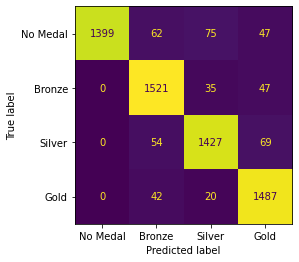

In [404]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelotree_pca, X_test_pca, y_test_pca, display_labels=['No Medal','Bronze','Silver','Gold'],colorbar=False)

In [405]:
print(metrics.accuracy_score(y_test_pca,predtree_pca))

0.92824184566428


In [406]:
print(metrics.classification_report(y_test_pca, predtree_pca))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94      1583
           1       0.91      0.95      0.93      1603
           2       0.92      0.92      0.92      1550
           3       0.90      0.96      0.93      1549

    accuracy                           0.93      6285
   macro avg       0.93      0.93      0.93      6285
weighted avg       0.93      0.93      0.93      6285



Obtenemos un accuracy de un 92%, mucho mejor que los que veníamos obteniendo hasta ahora, demostrando la eficacia del balanceo y la aplicación de PCA.

### Random Forest Classifier

In [407]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [408]:
modelrf = RandomForestClassifier(n_jobs=-1,random_state=123)
modelrf.fit(X_train_pca,y_train_pca)
y_train_hat = modelrf.predict(X_train_pca)
y_test_hat = modelrf.predict(X_test_pca)

print(modelrf)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train_pca, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test_pca, y_test_hat))


RandomForestClassifier(n_jobs=-1, random_state=123)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      4702
           1       0.92      0.94      0.93      4682
           2       0.96      0.91      0.93      4735
           3       0.91      0.96      0.94      4736

    accuracy                           0.95     18855
   macro avg       0.95      0.95      0.95     18855
weighted avg       0.95      0.95      0.95     18855

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1583
           1       0.92      0.95      0.93      1603
           2       0.94      0.92      0.93      1550
           3       0.91      0.96      0.93      1549

    accuracy                           0.94      6285
   macro avg       0.94      0.94      0

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

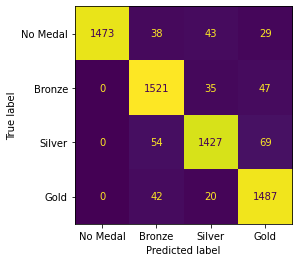

In [409]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelrf, X_test_pca, y_test_pca, display_labels=['No Medal','Bronze','Silver','Gold'],colorbar=False)

Con este algoritmo obtuvimos un accuracy con los datos de testeo del 93%, ligeramente superior al obtenido con el algoritmo de árboles de decisión. 

### MLP Classifier

In [410]:
from sklearn.neural_network import MLPClassifier

In [411]:
modelmlp = MLPClassifier()
modelmlp.fit(X_train_pca, y_train_pca)
y_train_hat = modelmlp.predict(X_train_pca)
y_test_hat = modelmlp.predict(X_test_pca)

print(modelmlp)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train_pca, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test_pca, y_test_hat))


MLPClassifier()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.45      0.52      0.48      4702
           1       0.45      0.25      0.32      4682
           2       0.44      0.38      0.41      4735
           3       0.43      0.60      0.50      4736

    accuracy                           0.44     18855
   macro avg       0.44      0.44      0.43     18855
weighted avg       0.44      0.44      0.43     18855

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.44      0.49      0.46      1583
           1       0.45      0.26      0.33      1603
           2       0.41      0.37      0.39      1550
           3       0.41      0.58      0.48      1549

    accuracy                           0.43      6285
   macro avg       0.43      0.43      0.42      6285
weighted avg       0.4

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

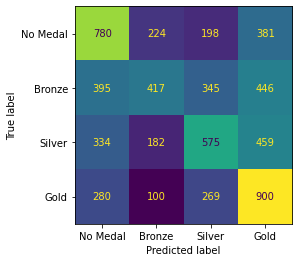

In [412]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelmlp, X_test_pca, y_test_pca, display_labels=['No Medal','Bronze','Silver','Gold'],colorbar=False)

Con este modelo el accuracy es de 44%, significativamente menor que con Random Forest y Decision Tree. Esto puede observarse también en la matriz de confusión.

El algortimo elegido por su mejor performance es **Random Forest Classifier**

## Optimización de hiperparámetros con Randomized Search Cv

In [413]:
from sklearn.model_selection import RandomizedSearchCV
# Random forest
# n_jobs=-1 corre en todos los CPUs
params = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2,4,5],
    'min_samples_leaf': [1,2,4,5],
    'max_leaf_nodes': [4,10,20,50,None]
}

gs1 = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1), params, n_jobs=-1, scoring='accuracy')
gs1.fit(X_train_pca, y_train_pca)


RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_leaf_nodes': [4, 10, 20, 50, None],
                                        'min_samples_leaf': [1, 2, 4, 5],
                                        'min_samples_split': [2, 4, 5],
                                        'n_estimators': [100, 200, 500]},
                   scoring='accuracy')

In [414]:
print("Mejores parametros", gs1.best_params_)
print("Mejor score de CV", gs1.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test_pca, gs1.predict(X_test_pca)), 5)}')

Mejores parametros {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_leaf_nodes': None, 'criterion': 'gini'}
Mejor score de CV 0.9216653407584194
Accuracy del modelo = 0.93556


# Conclusiones

A lo largo del proyecto se buscó responder el problema comercial y desarrollar un algoritmo que pudiese clasificar a las participantes de atletismo en función de si obtendrán o no una medalla. 
En primer lugar se hizo un acercamiento a los datos, obteniendo conclusiones valiosas que supieron orientar la búsqueda y entender el problema. 
Luego, se trabajó sobre el dataset, imputando datos nulos, transformando variables categóricas en numéricas, balanceándolo y estandarizándolo para poder así realizar un feature selection y obtener mejores resultados. Luego, se procedió a aplicar 3 algoritmos de clasificación al dataset mejorado.
Random Forest Classifier fue el que obtuvo la mejor performance. Por último, se realizó una optimización de hiperparámetros para obtener así los mejores resultados posibles.